In [36]:
import torch
import torchvision           # Use it or vision 
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [20]:
            # Downloading the data
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST ("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [21]:
            # Prepare the data
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [22]:
            # Check the data as matrix
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [23]:
            # Check the special tensor in index
x, y = data[0][0], data[1][4]
print(y)

tensor(9)


In [24]:
len(train)
train_data.train_lables

NameError: name 'train_data' is not defined

In [25]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

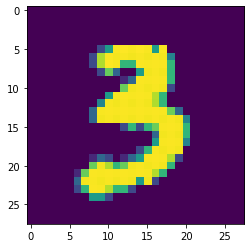

In [26]:
# Visual the data in range 0-9
plt.imshow(data[0][0].view(28, 28))

tensor(5)


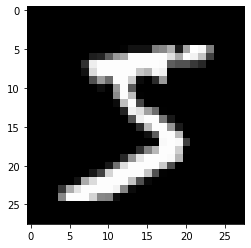

In [27]:
            # Or we can visual like this, and visual what we want  
i = 0
print(trainset.dataset.targets[i])
plt.imshow(trainset.dataset.data[i], cmap = "gray")

In [28]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [29]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter[int(y)] +=1
        total +=1
print (counter)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [30]:
for i in counter:
    print(f"{i}: {counter[i]/total *100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [31]:
class Net (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear (28*28, 64)
        self.fc2 = nn.Linear (64, 64)
        self.fc3 = nn.Linear (64, 64)
        self.fc4 = nn.Linear (64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [32]:
X = torch.rand ((28,28))
X = X.view(-1, 28*28)

output = net (X)
output

tensor([[-2.3708, -2.3189, -2.2008, -2.3797, -2.2305, -2.2173, -2.2513, -2.3792,
         -2.3340, -2.3673]], grad_fn=<LogSoftmaxBackward>)

In [33]:
optimizer = optim.Adam(net.parameters(), lr=0.001)        # add optimizer

In [34]:
EPOCHS = 4
for epoch in range (EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.8988, grad_fn=<NllLossBackward>)
tensor(0.0109, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)


In [35]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
                
print("Accuracy: ", round(correct/total, 3))                

Accuracy:  0.981
